t: 0.000 s, Suhu rata-rata: 24.80 Celcius


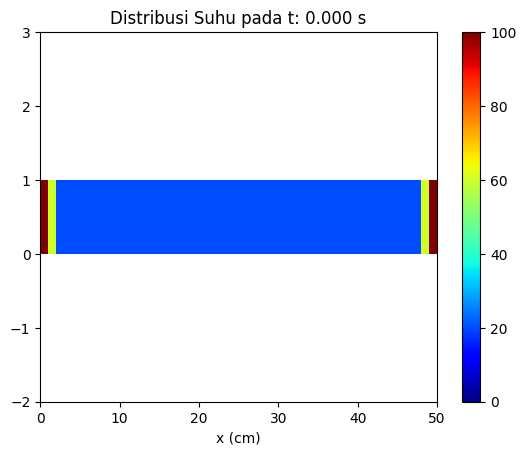

t: 0.005 s, Suhu rata-rata: 25.60 Celcius
t: 0.009 s, Suhu rata-rata: 26.40 Celcius
t: 0.014 s, Suhu rata-rata: 27.00 Celcius
t: 0.018 s, Suhu rata-rata: 27.60 Celcius
t: 0.023 s, Suhu rata-rata: 28.10 Celcius
t: 0.027 s, Suhu rata-rata: 28.60 Celcius
t: 0.032 s, Suhu rata-rata: 29.04 Celcius
t: 0.036 s, Suhu rata-rata: 29.48 Celcius
t: 0.041 s, Suhu rata-rata: 29.87 Celcius
t: 0.045 s, Suhu rata-rata: 30.26 Celcius
t: 0.050 s, Suhu rata-rata: 30.62 Celcius
t: 0.055 s, Suhu rata-rata: 30.98 Celcius
t: 0.059 s, Suhu rata-rata: 31.32 Celcius
t: 0.064 s, Suhu rata-rata: 31.65 Celcius
t: 0.068 s, Suhu rata-rata: 31.97 Celcius
t: 0.073 s, Suhu rata-rata: 32.28 Celcius
t: 0.077 s, Suhu rata-rata: 32.58 Celcius
t: 0.082 s, Suhu rata-rata: 32.88 Celcius
t: 0.086 s, Suhu rata-rata: 33.16 Celcius
t: 0.091 s, Suhu rata-rata: 33.44 Celcius
t: 0.095 s, Suhu rata-rata: 33.71 Celcius
t: 0.100 s, Suhu rata-rata: 33.98 Celcius
t: 0.105 s, Suhu rata-rata: 34.24 Celcius
t: 0.109 s, Suhu rata-rata: 34.49 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mendefinisikan Variabel
a = 110  # Koefisien Difusivitas Termal [m^2/s]
panjang = 50  # Panjang plat [m]
waktu = 1.5  # Waktu simulasi [s]
node = 50  # Jumlah titik grid

dx = panjang / node  # Jarak antar titik grid [m]
dt = 0.5 * dx ** 2 / a  # Ukuran waktu simulasi [s]
t_n = int(waktu / dt)  # Jumlah iterasi simulasi
u = np.zeros(node) + 20  # Suhu awal plat [ degC ]

# Kondisi Batas
u[0] = 100  # Suhu ujung kiri plat [ degC ]
u[-1] = 100  # Suhu ujung kanan plat [ degC ]

# Visualisasi
fig, ax = plt.subplots()
ax.set_xlabel("x (cm)")
pcm = ax.pcolormesh([u], cmap=plt.cm.jet, vmin=0, vmax=100)  # Plot distribusi suhu
plt.colorbar(pcm, ax=ax)
ax.set_ylim([-2, 3])  # Batas skala y

# Simulasi
counter = 0
while counter < waktu:
    w = u.copy()  # Menyalin data suhu untuk perhitungan
    for i in range(1, node - 1):  # Melooping setiap titik grid kecuali batas
        u[i] = (dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx ** 2) + w[i]  # Perhitungan suhu baru berdasarkan persamaan difusi panas

    print("t: {:.3f} s, Suhu rata-rata: {:.2f} Celcius".format(counter, np.mean(u)))
    pcm.set_array([u])
    ax.set_title("Distribusi Suhu pada t: {:.3f} s".format(counter))
    counter += dt  # Menambah waktu simulasi
    plt.pause(0.01)  # Menunda plot untuk animasi

plt.show()